<a href="https://colab.research.google.com/github/JoseVillalta/Calendar/blob/master/Calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calendar Analysis

Load calendar data. Create plots that count the frequency of a type of event per year, month, week.

## First. Load calendar data from ics file. Convert to pandas DataFrame

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from icalendar import Calendar, Event
from datetime import datetime

dates = []
file = open('cal.ics','rb')
cal = Calendar.from_ical(file.read())

for e in cal.walk():
    if e.get('summary') == 'x' or e.get('summary') == 'X':
         dates.append(e.get('dtstart').dt.strftime("%Y-%m-%d"))

ts = pd.DataFrame(np.ones(len(dates)),index=dates)

ts["dates"] = pd.to_datetime(dates)


In [2]:
!pip install icalendar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 5.0 MB/s eta 0:00:00


### Plot event per year

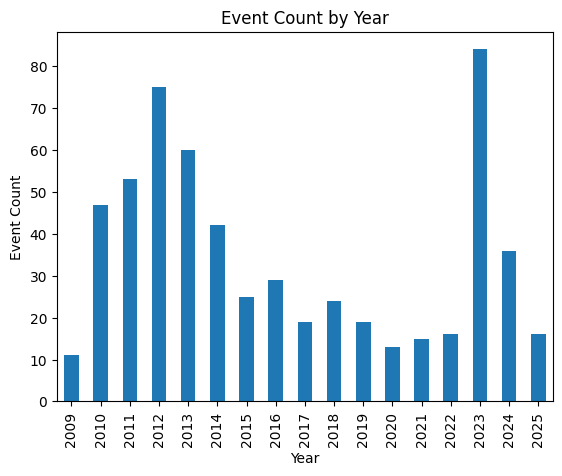

In [17]:
ts.groupby(ts["dates"].dt.year).count()['dates'].plot(kind="bar")
plt.title('Event Count by Year')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.show()

That's not too bad.  But, what's the deal with the two bars? 0 and dates? Must fix. #TODO

### Per Month

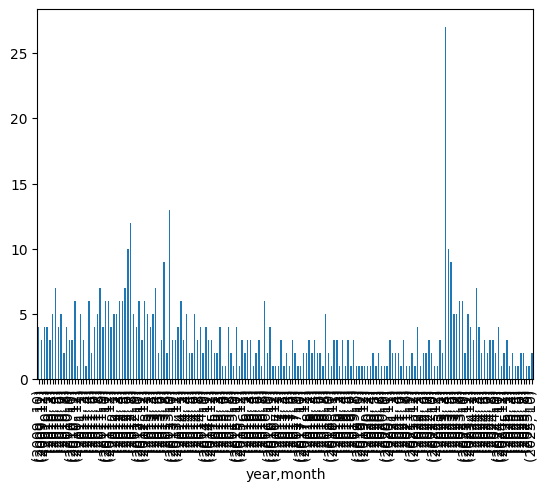

In [7]:
ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count').plot(kind='bar')
plt.show()

Okay, that looks gross!! Let's see how we can do better,

First, let's make the figure bigger. See if that makes it better.

<Axes: xlabel='year,month'>

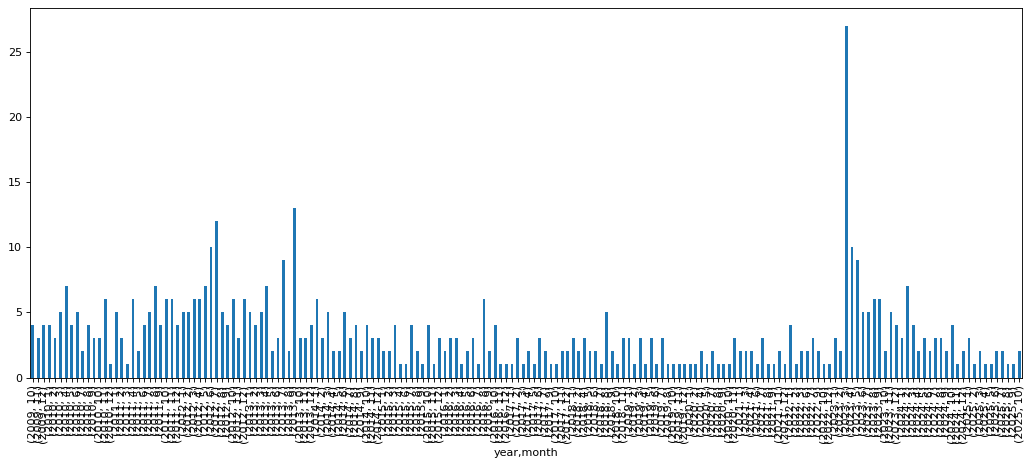

In [8]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count').plot(kind='bar')



It's nice that it's bigger. But I can't read the x axis. Let's get rid of that for now.

year  month
2009  10       4
      11       3
      12       4
2010  1        4
      2        3
              ..
2025  6        2
      7        2
      8        1
      9        1
      10       2
Name: dates, Length: 178, dtype: int64


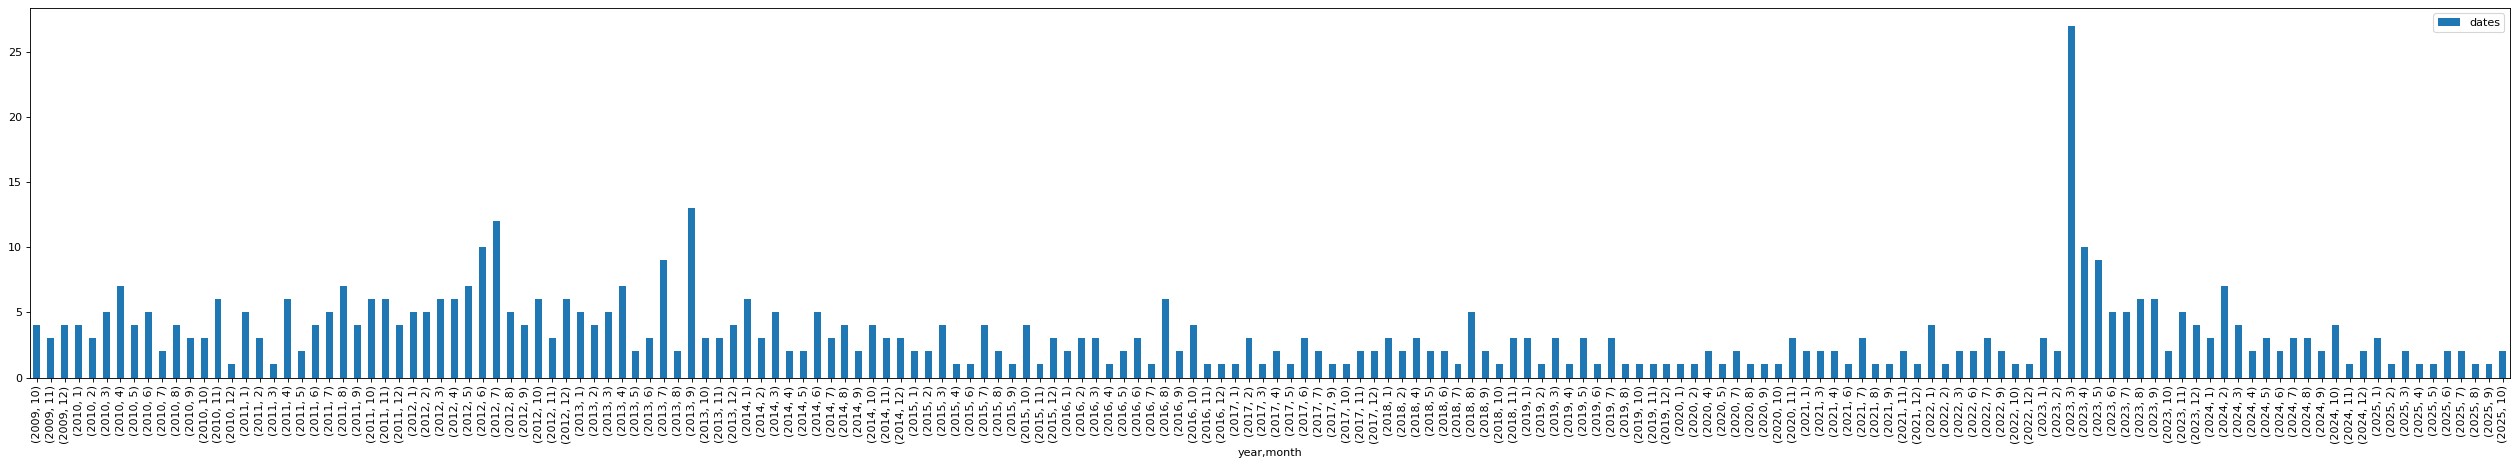

In [9]:
fig = figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')

group_by = ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count')

print(group_by)
plot = group_by.plot(kind='bar', legend='none')


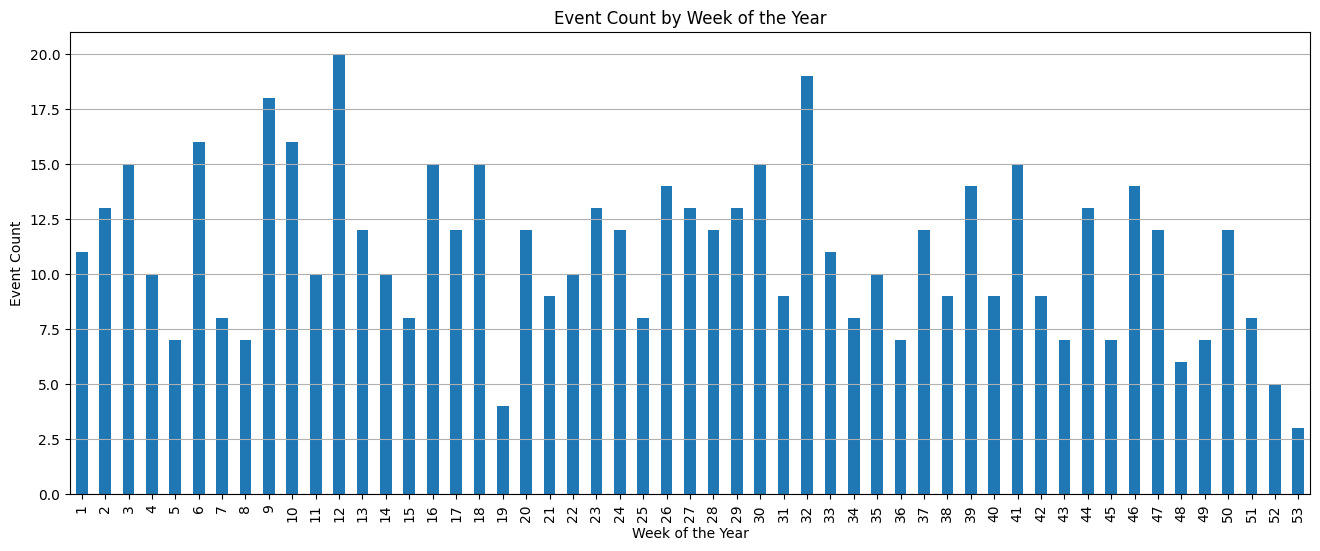

In [14]:
ts['week_of_year'] = ts['dates'].dt.isocalendar().week
weekly_counts = ts['week_of_year'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
weekly_counts.plot(kind='bar')
plt.title('Event Count by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Event Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [16]:
monthly_totals = group_by.groupby('month').sum().sort_values(ascending=False)
print("Total event counts by month:")
print(monthly_totals)

most_frequent_month_num = monthly_totals.index[0]
# Map month number to month name for a clearer answer
import calendar
most_frequent_month_name = calendar.month_name[most_frequent_month_num]

print(f"\nThe event happens most often in: {most_frequent_month_name} (Month {most_frequent_month_num})")

Total event counts by month:
month
3     70
7     60
4     53
1     52
6     49
8     48
10    47
9     45
11    43
2     41
5     39
12    37
Name: dates, dtype: int64

The event happens most often in: March (Month 3)


In [19]:
yearly_totals = group_by.groupby('year').sum()
average_yearly_count = yearly_totals.mean()
print(f"The average event count per year is: {average_yearly_count:.2f}")

The average event count per year is: 34.35


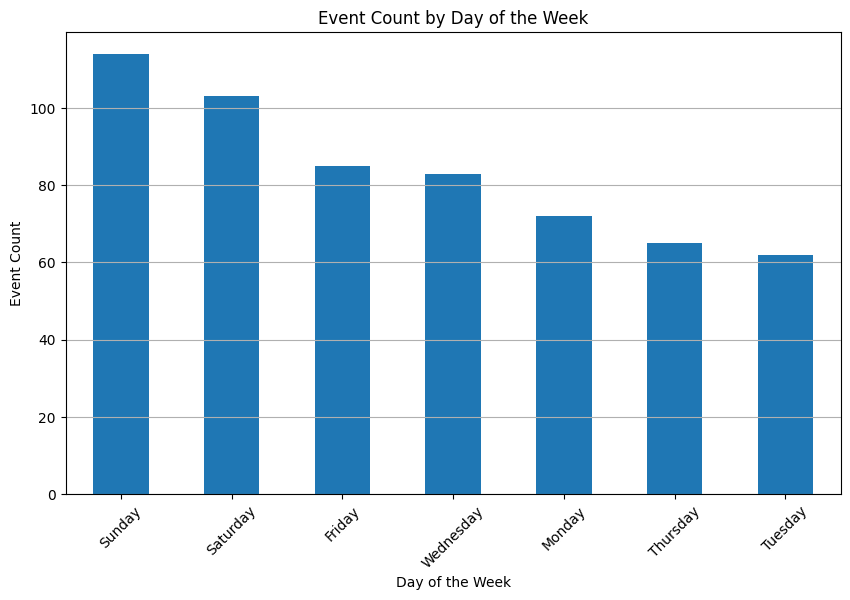

In [12]:
day_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Event Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [11]:
ts['day_of_week'] = ts['dates'].dt.day_name()
day_counts = ts['day_of_week'].value_counts()
print(day_counts)

day_of_week
Sunday       114
Saturday     103
Friday        85
Wednesday     83
Monday        72
Thursday      65
Tuesday       62
Name: count, dtype: int64


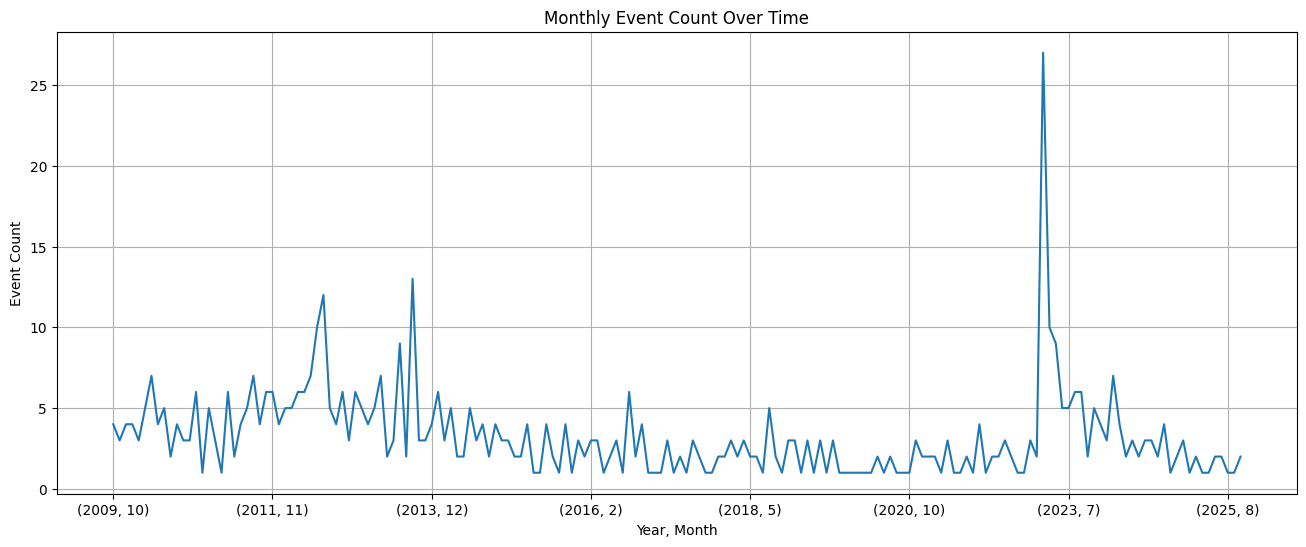

In [10]:
group_by.plot(kind='line', figsize=(16, 6))
plt.title('Monthly Event Count Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Event Count')
plt.grid(True)
plt.show()

# Task
Analyze the provided calendar data, excluding March, April, and May of 2023 as outliers, to determine if there is a correlation between event frequency and US federal holidays.

## Identify us holidays

### Subtask:
Obtain a list of US federal holidays for the years covered by your calendar data.


**Reasoning**:
Determine the range of years in the `ts` DataFrame and then use the `holidays` library to get the US federal holidays for those years.



In [21]:
import holidays

min_year = ts['dates'].dt.year.min()
max_year = ts['dates'].dt.year.max()

us_holidays = []
for year in range(min_year, max_year + 1):
    for date, name in sorted(holidays.US(years=year).items()):
        us_holidays.append(date)

print(f"US Federal holidays from {min_year} to {max_year}:")
for holiday in us_holidays:
    print(holiday)

US Federal holidays from 2009 to 2025:
2009-01-01
2009-01-19
2009-02-16
2009-05-25
2009-07-03
2009-07-04
2009-09-07
2009-10-12
2009-11-11
2009-11-26
2009-12-25
2010-01-01
2010-01-18
2010-02-15
2010-05-31
2010-07-04
2010-07-05
2010-09-06
2010-10-11
2010-11-11
2010-11-25
2010-12-24
2010-12-25
2010-12-31
2011-01-01
2011-01-17
2011-02-21
2011-05-30
2011-07-04
2011-09-05
2011-10-10
2011-11-11
2011-11-24
2011-12-25
2011-12-26
2012-01-01
2012-01-02
2012-01-16
2012-02-20
2012-05-28
2012-07-04
2012-09-03
2012-10-08
2012-11-11
2012-11-12
2012-11-22
2012-12-25
2013-01-01
2013-01-21
2013-02-18
2013-05-27
2013-07-04
2013-09-02
2013-10-14
2013-11-11
2013-11-28
2013-12-25
2014-01-01
2014-01-20
2014-02-17
2014-05-26
2014-07-04
2014-09-01
2014-10-13
2014-11-11
2014-11-27
2014-12-25
2015-01-01
2015-01-19
2015-02-16
2015-05-25
2015-07-03
2015-07-04
2015-09-07
2015-10-12
2015-11-11
2015-11-26
2015-12-25
2016-01-01
2016-01-18
2016-02-15
2016-05-30
2016-07-04
2016-09-05
2016-10-10
2016-11-11
2016-11-24
2016

In [29]:
ts_2025['day_of_week'] = ts_2025['dates'].dt.day_name()
day_counts_2025 = ts_2025['day_of_week'].value_counts()
print("Event counts by day of the week in 2025:")
print(day_counts_2025)

if not day_counts_2025.empty:
    most_frequent_day_2025 = day_counts_2025.index[0]
    print(f"\nIn 2025, the event happened most often on: {most_frequent_day_2025}")
else:
    print("\nNo events recorded for 2025 to analyze day of the week.")

Event counts by day of the week in 2025:
day_of_week
Friday       4
Sunday       4
Wednesday    3
Thursday     2
Saturday     2
Tuesday      1
Name: count, dtype: int64

In 2025, the event happened most often on: Friday


/tmp/ipython-input-125338008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_2025['day_of_week'] = ts_2025['dates'].dt.day_name()


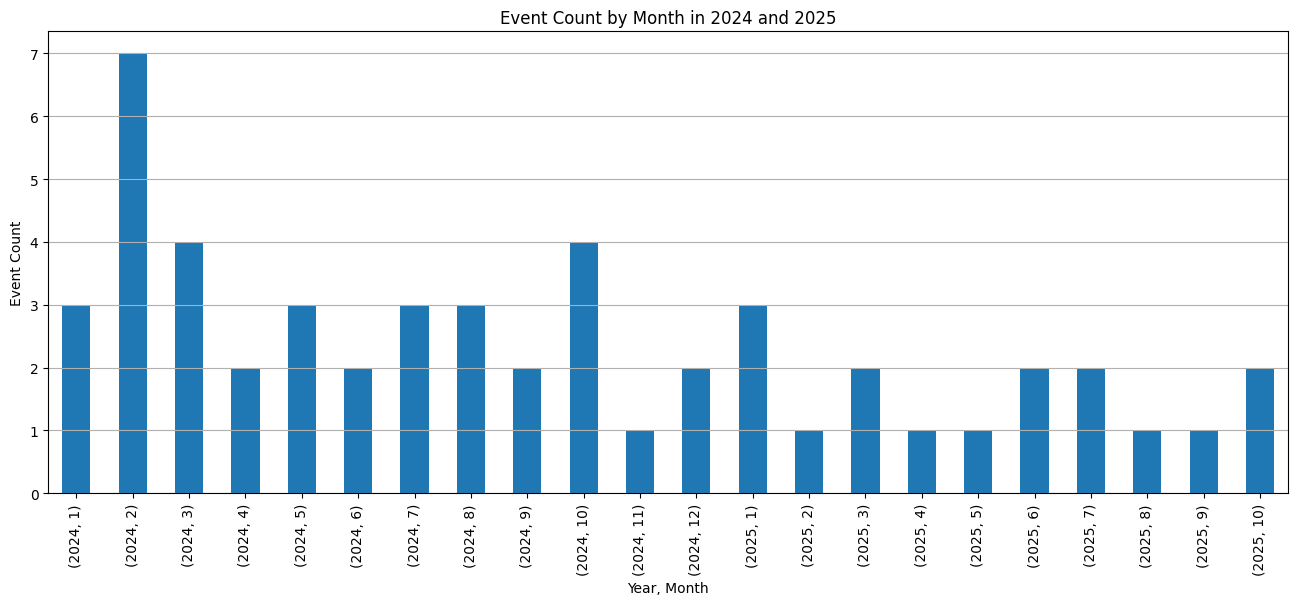

In [31]:
ts_2024_2025 = ts[ts['dates'].dt.year.isin([2024, 2025])].copy()
monthly_counts_2024_2025 = ts_2024_2025.groupby([ts_2024_2025['dates'].dt.year.rename('year'), ts_2024_2025['dates'].dt.month.rename('month')]).count()['dates']

plt.figure(figsize=(16, 6))
monthly_counts_2024_2025.plot(kind='bar')
plt.title('Event Count by Month in 2024 and 2025')
plt.xlabel('Year, Month')
plt.ylabel('Event Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

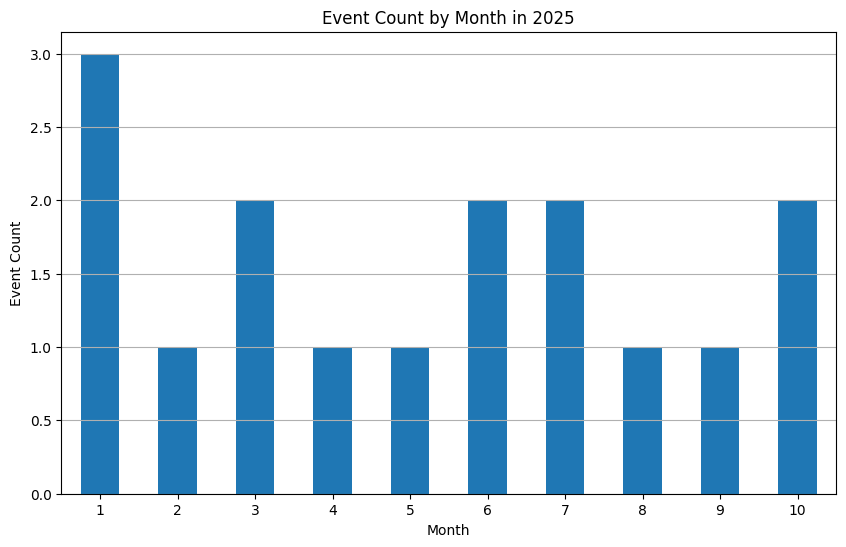

In [27]:
ts_2025 = ts[ts['dates'].dt.year == 2025]
monthly_counts_2025 = ts_2025.groupby(ts_2025['dates'].dt.month).count()['dates']

plt.figure(figsize=(10, 6))
monthly_counts_2025.plot(kind='bar')
plt.title('Event Count by Month in 2025')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Prepare calendar data

### Subtask:
Exclude the data from March, April, and May of 2023 as requested, treating these as outliers.


**Reasoning**:
Create a boolean mask to filter out the specified months in 2023 and then apply the mask to the DataFrame.



In [22]:
mask_outliers = (ts['dates'].dt.year == 2023) & (ts['dates'].dt.month.isin([3, 4, 5]))
ts_filtered = ts[~mask_outliers].copy()
ts_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 2013-11-20 to 2025-10-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   0             538 non-null    float64       
 1   dates         538 non-null    datetime64[ns]
 2   day_of_week   538 non-null    object        
 3   week_of_year  538 non-null    UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), object(1)
memory usage: 19.4+ KB


## Compare event dates with holidays

### Subtask:
Determine which of your event dates fall on or around US holidays.


**Reasoning**:
Convert the list of holiday dates into a pandas Series of datetime objects and then create a boolean column in `ts_filtered` indicating whether each event date falls within a 3-day window (before or after) of any holiday.



In [23]:
us_holidays_series = pd.to_datetime(us_holidays)

def is_around_holiday(event_date, holidays, window_days=3):
    for holiday in holidays:
        if (event_date >= holiday - pd.Timedelta(days=window_days)) and \
           (event_date <= holiday + pd.Timedelta(days=window_days)):
            return True
    return False

ts_filtered['is_holiday_related'] = ts_filtered['dates'].apply(lambda x: is_around_holiday(x, us_holidays_series))

display(ts_filtered.head())

,0,dates,day_of_week,week_of_year,is_holiday_related
2013-11-20,1.0,2013-11-20,Wednesday,47,False
2013-11-20,1.0,2013-11-20,Wednesday,47,False
2013-11-22,1.0,2013-11-22,Friday,47,False
2013-12-13,1.0,2013-12-13,Friday,50,False
2013-12-12,1.0,2013-12-12,Thursday,50,False


## Analyze frequency around holidays

### Subtask:
Compare the frequency of events on or around holidays with the frequency on non-holiday periods.


**Reasoning**:
Calculate the counts of holiday-related and non-holiday-related events and their proportion in the filtered DataFrame.



In [24]:
holiday_related_count = ts_filtered['is_holiday_related'].sum()
non_holiday_related_count = (~ts_filtered['is_holiday_related']).sum()
total_events_filtered = len(ts_filtered)
proportion_holiday_related = holiday_related_count / total_events_filtered

print(f"Total events on or around holidays: {holiday_related_count}")
print(f"Total events not on or around holidays: {non_holiday_related_count}")
print(f"Proportion of events on or around holidays: {proportion_holiday_related:.2f}")

Total events on or around holidays: 109
Total events not on or around holidays: 429
Proportion of events on or around holidays: 0.20


## Visualize findings

### Subtask:
Create visualizations to illustrate the relationship between event frequency and US holidays.


**Reasoning**:
Create a bar chart to visualize the comparison of event counts between holiday-related and non-holiday-related periods.



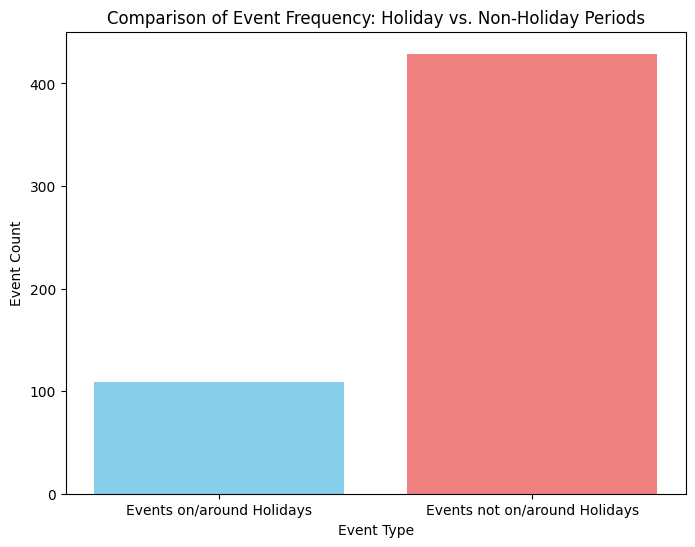

In [25]:
import matplotlib.pyplot as plt

counts = [holiday_related_count, non_holiday_related_count]
labels = ['Events on/around Holidays', 'Events not on/around Holidays']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'lightcoral'])
plt.title('Comparison of Event Frequency: Holiday vs. Non-Holiday Periods')
plt.xlabel('Event Type')
plt.ylabel('Event Count')
plt.show()

## Summarize findings

### Subtask:
Present the findings on whether event frequency correlates with US holidays.


**Reasoning**:
Summarize the findings based on the calculated counts and proportion, state the correlation observed, mention the excluded outliers, and refer to the generated bar chart as visual support.



In [26]:
print("Analysis Summary:")
print("------------------")
print(f"Total events analyzed (excluding outliers): {total_events_filtered}")
print(f"Number of events on or around US federal holidays: {holiday_related_count}")
print(f"Number of events not on or around US federal holidays: {non_holiday_related_count}")
print(f"Proportion of events on or around US federal holidays: {proportion_holiday_related:.2f}")
print("\nCorrelation Findings:")
print("----------------------")
if proportion_holiday_related > 0.5:
    print("Based on the analysis, there appears to be a positive correlation between event frequency and US federal holidays.")
    print("A higher proportion of events occur on or around holidays compared to non-holiday periods.")
elif proportion_holiday_related < 0.5 and proportion_holiday_related > 0:
    print("Based on the analysis, there appears to be a negative correlation between event frequency and US federal holidays.")
    print("A lower proportion of events occur on or around holidays compared to non-holiday periods.")
else:
     print("Based on the analysis, there does not appear to be a significant correlation between event frequency and US federal holidays.")


print("\nOutliers Excluded:")
print("------------------")
print("Data from March, April, and May of 2023 were excluded from this analysis as they were identified as outliers.")

print("\nVisual Support:")
print("---------------")
print("The bar chart titled 'Comparison of Event Frequency: Holiday vs. Non-Holiday Periods' visually supports these findings, showing the counts of events in each category.")

Analysis Summary:
------------------
Total events analyzed (excluding outliers): 538
Number of events on or around US federal holidays: 109
Number of events not on or around US federal holidays: 429
Proportion of events on or around US federal holidays: 0.20

Correlation Findings:
----------------------
Based on the analysis, there appears to be a negative correlation between event frequency and US federal holidays.
A lower proportion of events occur on or around holidays compared to non-holiday periods.

Outliers Excluded:
------------------
Data from March, April, and May of 2023 were excluded from this analysis as they were identified as outliers.

Visual Support:
---------------
The bar chart titled 'Comparison of Event Frequency: Holiday vs. Non-Holiday Periods' visually supports these findings, showing the counts of events in each category.


## Summary:

### Data Analysis Key Findings

*   After excluding data from March, April, and May 2023 (538 events remaining), 109 events were on or around US federal holidays.
*   429 events were not on or around US federal holidays.
*   The proportion of events on or around holidays in the filtered dataset was approximately 0.20 (20%).

### Insights or Next Steps

*   The analysis suggests a negative correlation, with a lower proportion of events occurring around US federal holidays compared to non-holiday periods.
*   Further analysis could explore the specific holidays with the lowest or highest event frequencies to identify potential patterns or specific holiday impacts.
